## SmartHealth: MIT-BIH Arrhythmia Database

https://physionet.org/content/mitdb/1.0.0/
    
https://archive.physionet.org/physiobank/database/html/mitdbdir/mitdbdir.htm

https://link.springer.com/chapter/10.1007/978-981-15-0829-5_41

https://www.mathworks.com/matlabcentral/fileexchange/66623-ecg-preprocessing-segmentation-and-obtaining-the-mean-p-qrs-t-fragment

https://archive.physionet.org/physiobank/annotations.shtml
    
#### Assignment 2: Devika Pace

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from warnings import simplefilter

### Import Data

In [2]:
ecg_test = pd.read_csv('mitbih_test.csv', header=None)
ecg_test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
ecg_test[187].value_counts()
# imbalanced data set

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [4]:
ecg_train = pd.read_csv('mitbih_train.csv', header=None)
ecg_train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [5]:
ecg_train[187].value_counts()/len(ecg_train)

0.0    0.827729
4.0    0.073452
2.0    0.066108
1.0    0.025390
3.0    0.007321
Name: 187, dtype: float64

In [6]:
ecg_test[187].value_counts()/len(ecg_test)

0.0    0.827608
4.0    0.073451
2.0    0.066143
1.0    0.025397
3.0    0.007400
Name: 187, dtype: float64

In [7]:
ecg_test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.0,0.758264,0.11157,0.0,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
ecg_train.head(1)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.04902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for x in [ecg_test, ecg_train]:
    x.columns = x.columns.map(lambda x: 'x' + str(x))
    x.rename(columns={'x187':'target'}, inplace=True)
    x['target'] = x['target'].astype(str)

In [10]:
ecg_test.info(), ecg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, x0 to target
dtypes: float64(187), object(1)
memory usage: 31.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, x0 to target
dtypes: float64(187), object(1)
memory usage: 125.6+ MB


(None, None)

In [11]:
X_train, X_test = ecg_train.iloc[:,:-1], ecg_test.iloc[:,:-1]
y_train, y_test = ecg_train.iloc[:, -1],  ecg_test.iloc[:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((87554, 187), (87554,), (21892, 187), (21892,))

## EDA

In [17]:
beats = {'N': 'Normal Beat',
         'V': 'Ventricular Ectopic Beat',
         'S': 'Supraventricular Ectopic Beat',
         'F': 'Fusion Beat',
         'Q': 'Unknown Beat'}

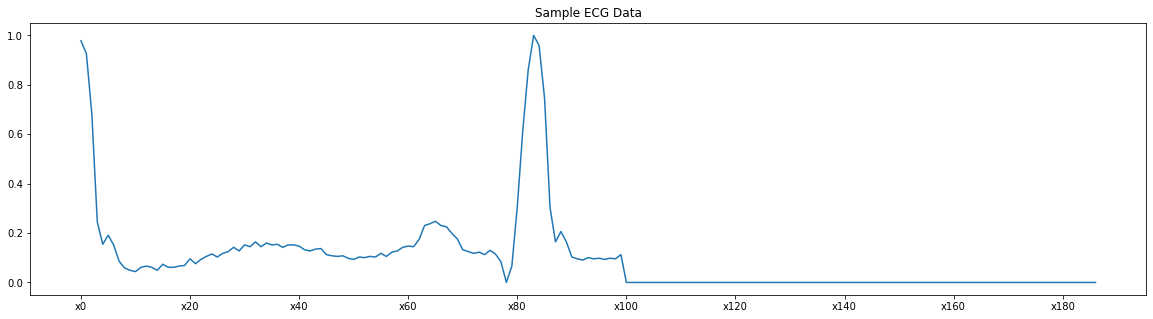

In [133]:
plt.figure(figsize=(20,5))
plt.plot(X_train.loc[0,:]);
plt.xticks(np.arange(0, 186, 20))
plt.title('Sample ECG Data')
plt.show()

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

def show_confusion_heatmap(X_test, y_test, class_names, model_name='Confusion Matrix', print_precision=2, cmap=plt.cm.Blues):
    np.set_printoptions(precision=print_precision)
    titles_options = [
        (f'{model_name} (without normalization)', None),
        (f'Normalized {model_name}', "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            log_reg,
            X_test,
            y_test,
            display_labels=class_names,
            cmap=cmap,
            normalize=normalize,
        )
        disp.ax_.set_title(title)
    plt.rcParams["figure.figsize"] = (7,7)
    plt.show()


## Models

In [63]:
track_models = []

### Logistic Regression


Confusion Matrix:

N: Normal Beat
V: Ventricular Ectopic Beat
S: Supraventricular Ectopic Beat
F: Fusion Beat
Q: Unknown Beat


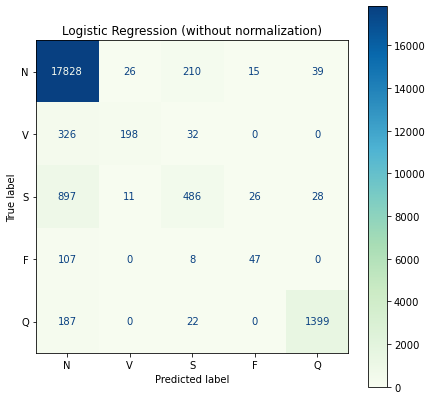

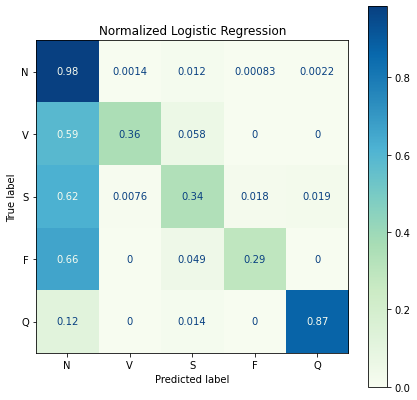

Classification Report:

               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.84      0.36      0.50       556
         2.0       0.64      0.34      0.44      1448
         3.0       0.53      0.29      0.38       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.64     21892
weighted avg       0.90      0.91      0.90     21892

Accuracy Score: 0.91
Precision: 0.78
Recall: 0.57


In [65]:
simplefilter("ignore")
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('\nConfusion Matrix:\n')
for k,v in beats.items(): 
    print(f'{k}: {v}')   
show_confusion_heatmap(X_test, y_test, beats.keys(), 'Logistic Regression', 2, cmap='GnBu');

print(f'Classification Report:\n\n {classification_report(y_test,y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):0.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):0.2f}')

track_models.append(['Logistic Regression', 
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred, average="macro"), 
                    recall_score(y_test, y_pred, average="macro")])

In [69]:
scores = cross_val_score(log_reg, X_train, y_train, cv=5)
scores.mean()

0.9125796923405671

### Decision Tree Classifier


Confusion Matrix:

N: Normal Beat
V: Ventricular Ectopic Beat
S: Supraventricular Ectopic Beat
F: Fusion Beat
Q: Unknown Beat


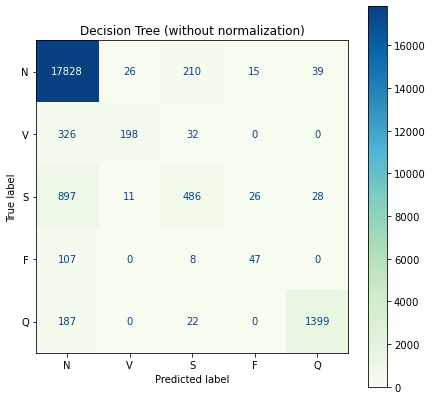

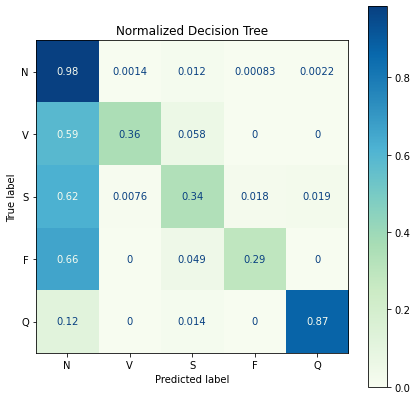

Classification Report:

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     18118
         1.0       0.63      0.64      0.63       556
         2.0       0.86      0.85      0.86      1448
         3.0       0.58      0.60      0.59       162
         4.0       0.94      0.94      0.94      1608

    accuracy                           0.95     21892
   macro avg       0.80      0.80      0.80     21892
weighted avg       0.95      0.95      0.95     21892

Accuracy Score: 0.95
Precision: 0.80
Recall: 0.80


In [108]:
simplefilter("ignore")
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0).fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('\nConfusion Matrix:\n')
for k,v in beats.items(): 
    print(f'{k}: {v}')   
show_confusion_heatmap(X_test, y_test, beats.keys(), 'Decision Tree', 2, cmap='GnBu');

print(f'Classification Report:\n\n {classification_report(y_test,y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):0.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):0.2f}')

track_models.append(['Decision Tree Classifier', 
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred, average="macro"), 
                    recall_score(y_test, y_pred, average="macro")])

In [68]:
scores = cross_val_score(dtc, X_train, y_train, cv=5)
scores.mean()

0.9536172139623682

### Random Forest


Confusion Matrix:

N: Normal Beat
V: Ventricular Ectopic Beat
S: Supraventricular Ectopic Beat
F: Fusion Beat
Q: Unknown Beat


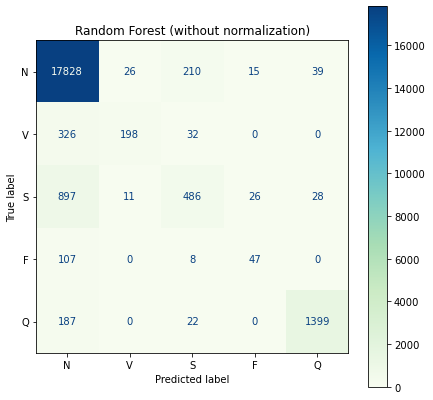

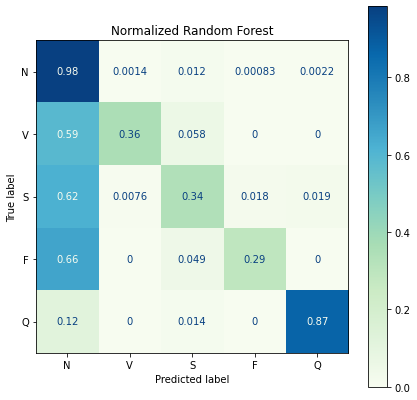

Classification Report:

               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.95      0.60      0.74       556
         2.0       0.98      0.86      0.92      1448
         3.0       0.85      0.59      0.69       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.80      0.86     21892
weighted avg       0.97      0.97      0.97     21892

Accuracy Score: 0.97
Precision: 0.95
Recall: 0.80


In [109]:
simplefilter("ignore")
rfc = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('\nConfusion Matrix:\n')
for k,v in beats.items(): 
    print(f'{k}: {v}')   
show_confusion_heatmap(X_test, y_test, beats.keys(), 'Random Forest', 2, cmap='GnBu');

print(f'Classification Report:\n\n {classification_report(y_test,y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):0.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):0.2f}')

track_models.append(['Random Forest Classifier', 
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred, average="macro"), 
                    recall_score(y_test, y_pred, average="macro")])

In [71]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)
scores.mean()

0.9722228576499568

### Extremely Randomized Tree


Confusion Matrix:

N: Normal Beat
V: Ventricular Ectopic Beat
S: Supraventricular Ectopic Beat
F: Fusion Beat
Q: Unknown Beat


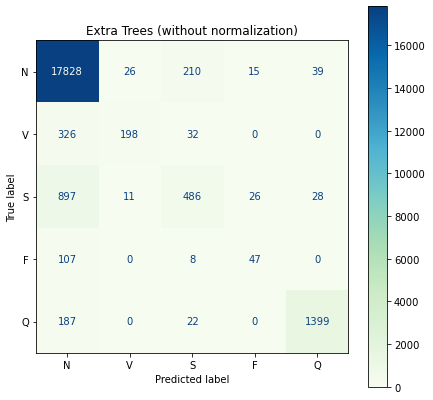

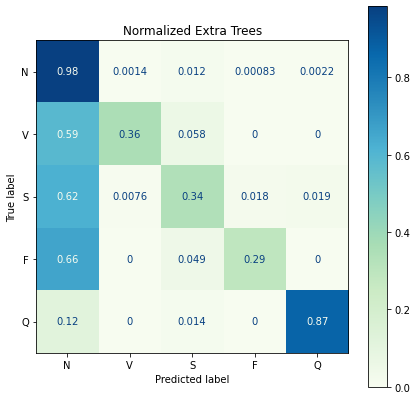

Classification Report:

               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.96      0.61      0.75       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.89      0.65      0.75       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.82      0.88     21892
weighted avg       0.97      0.97      0.97     21892

Accuracy Score: 0.97
Precision: 0.96
Recall: 0.82


In [110]:
simplefilter("ignore")
etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0).fit(X_train, y_train)
y_pred = etc.predict(X_test)

print('\nConfusion Matrix:\n')
for k,v in beats.items(): 
    print(f'{k}: {v}')   
show_confusion_heatmap(X_test, y_test, beats.keys(), 'Extra Trees', 2, cmap='GnBu');

print(f'Classification Report:\n\n {classification_report(y_test,y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):0.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):0.2f}')

track_models.append(['Extra Trees Classifier', 
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred, average="macro"), 
                    recall_score(y_test, y_pred, average="macro")])

In [73]:
scores = cross_val_score(etc, X_train, y_train, cv=5)
scores.mean()

0.9735820078957632

## Model Selection

In [78]:
view_models = pd.DataFrame(track_models)
view_models.columns = ['Model', 'Accuracy', 'Precision', 'Recall']
view_models

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.911657,0.778737,0.567179
1,Decision Tree Classifier,0.953316,0.797417,0.802059
2,Random Forest Classifier,0.971999,0.948484,0.798478
3,Extra Trees Classifier,0.974694,0.959407,0.819056


**Best Model**: Extra Trees Classifier is most performant on all metrics.

### Reduce Cardinality

Select the optimal number of features using recursive feature elimination with cross-validation (RFECV).

Optimal number of features : 69


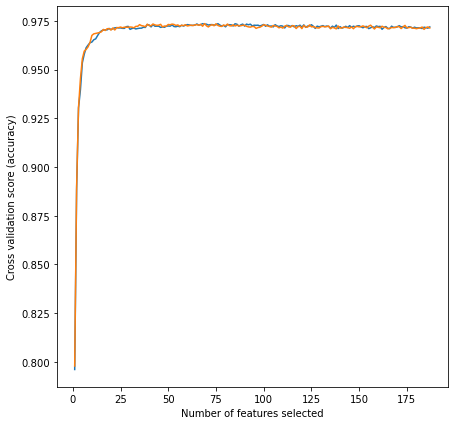

In [80]:
# try our best model - extra tree classifier, etc
min_features_to_select = 1  
rfecv = RFECV(
    estimator=etc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

Select the top 69 features to include in the model.

In [93]:
# Extra tree classifier ascending importance
etc.feature_importances_.argsort()

array([169, 172, 161, 164, 181, 165, 156, 179, 173, 171, 167, 149, 163,
       166, 174, 175, 178, 182, 152, 145, 168, 155, 177, 141, 144, 176,
       148, 160, 158, 180, 183, 186, 140, 134, 170, 143, 159, 146, 142,
       150, 138, 132, 137, 184, 128, 185, 133, 162, 114, 118, 110, 123,
       119, 125, 108, 120, 122, 126, 157, 151, 154, 105, 107,  78, 101,
       113, 153, 116,  63,  85,  93, 121,  71, 117, 135,  90, 109,  79,
        67,  97,  70,  68,  83,  69,  81, 147,  84,  76, 136, 112,  77,
       124, 103, 130,  88, 106, 139, 115,  73,  64,  80,  82, 127,  66,
       111,  94,  54,  74,  57,  92,  86,  75,  62,  91,  51, 129,  61,
        72,  41,  65,  95,  50,  47, 131,  46,  59,  60,  45,  48,  40,
       100,  96,  87,  89,  38,  36,  15,  32,  53,  30,  21,  23,  26,
        39,  31,  25,  19,  28,  43,  58,  37,  49,  16,  18,  35,  52,
        56, 102,  33,  22,  42, 104,  24,  17,  20,  14,  27,  55,  99,
         9,  13,  29,  11,  98,   0,   7,   8,  10,  44,  12,   

In [98]:
# Top 69 features, listed in order of importance (descending order)
optimal_features = 69
opt_features = etc.feature_importances_.argsort()[::-1][:69]
opt_features

array([  4,   3,   6,   5,   1,  34,   2,  12,  44,  10,   8,   7,   0,
        98,  11,  29,  13,   9,  99,  55,  27,  14,  20,  17,  24, 104,
        42,  22,  33, 102,  56,  52,  35,  18,  16,  49,  37,  58,  43,
        28,  19,  25,  31,  39,  26,  23,  21,  30,  53,  32,  15,  36,
        38,  89,  87,  96, 100,  40,  48,  45,  60,  59,  46, 131,  47,
        50,  95,  65,  41])

Features recorded earlier in the ECG data appear to carry more importance.  On inspection of the original dataset, it appeared that not all signals utilized the full time frame for feature recording which may explain this finding.

### Drop Extraneous Features

In [102]:
X_train_opt, X_test_opt = X_train.iloc[:, opt_features], X_test.iloc[:, opt_features]
X_train_opt.shape, X_test_opt.shape

((87554, 69), (21892, 69))

### Retrain Extra Trees Classifier with Optimal Features Only


Confusion Matrix:

N: Normal Beat
V: Ventricular Ectopic Beat
S: Supraventricular Ectopic Beat
F: Fusion Beat
Q: Unknown Beat


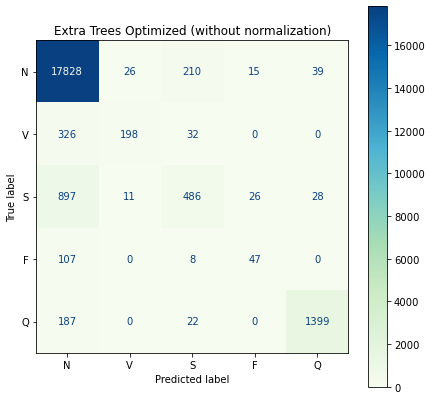

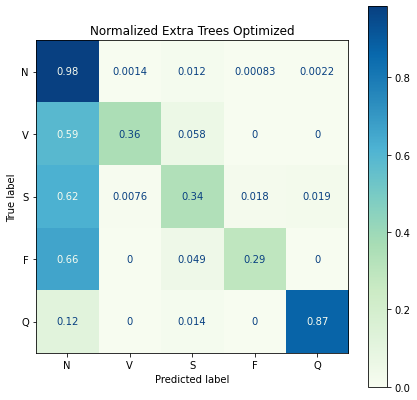

Classification Report:

               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.97      0.60      0.74       556
         2.0       0.97      0.89      0.93      1448
         3.0       0.90      0.61      0.73       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892

Accuracy Score: 0.97
Precision: 0.96
Recall: 0.81


In [134]:
simplefilter("ignore")
etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0).fit(X_train_opt, y_train)
y_pred = etc.predict(X_test_opt)

print('\nConfusion Matrix:\n')
for k,v in beats.items(): 
    print(f'{k}: {v}')   
show_confusion_heatmap(X_test, y_test, beats.keys(), 'Extra Trees Optimized', 2, cmap='GnBu');

print(f'Classification Report:\n\n {classification_report(y_test,y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):0.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro"):0.2f}')

track_models.append(['Extra Trees Classifier Optimized', 
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred, average="macro"), 
                    recall_score(y_test, y_pred, average="macro")])

In [141]:
view_models_opt = pd.DataFrame(track_models)
view_models_opt.columns = ['Model', 'Accuracy', 'Precision', 'Recall']
view_models_opt

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.911657,0.778737,0.567179
1,Decision Tree Classifier,0.953316,0.797417,0.802059
2,Random Forest Classifier,0.971999,0.948484,0.798478
3,Extra Trees Classifier,0.974694,0.959407,0.819056
4,Extra Trees Classifier Optimized,0.974237,0.960707,0.808376


### Conclusion

Our final performance of the extra trees classifier, optimized by reducing cardinality, is comparable to the full featured model on all metrics, while being more efficient by utilizing just the subset.